In [144]:
from pylab import*
from scipy.integrate import*
%matplotlib inline 

In [7]:
def RK4(ec, p_ini, x, args=0, h=0.01):
    if (x[1] - x[0]) <= 5.*h:
        h= (x[1] - x[0])/10
    tiempos=arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:]=p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k_1=ec(sol[i,:],tiempos[i])
            k_2=ec(sol[i,:]+0.5*h*k_1,tiempos[i]+0.5*h)
            k_3=ec(sol[i,:]+0.5*h*k_2,tiempos[i]+0.5*h)
            k_4=ec(sol[i,:]+h*k_3,tiempos[i]+h)
            sol[i+1,:]= sol[i,:]+ (h/6.)*(k_1+2*k_2+2*k_3+k_4)
    else:
        for i in xrange(len(tiempos)-1):
            k_1=ec(sol[i,:],tiempos[i],args)
            k_2=ec(sol[i,:]+0.5*h*k_1,tiempos[i]+0.5*h,args)
            k_3=ec(sol[i,:]+0.5*h*k_2,tiempos[i]+0.5*h,args)
            k_4=ec(sol[i,:]+h*k_3,tiempos[i]+h,args)
            sol[i+1,:]= sol[i,:]+ (h/6.)*(k_1+2*k_2+2*k_3+k_4)
    return tiempos,sol

In [17]:
def fric_id(v):
    return array([0,0])

def fric_v(v,gamma=0.1):
    f_x = gamma*v[0]
    f_y = gamma*v[1]
    return array([f_x,f_y])

def fric_v2(v,gamma=0.1):
    norm_v = sqrt(v[0]**2 + v[1]**2)
    f_x = gamma*norm_v*v[0]
    f_y = gamma*norm_v*v[1]
    return array([f_x,f_y])

In [36]:
def rebote(r_v_i,mi_dt,fric):  # r_i es la coordenada inicial
        dt_busqueda = mi_dt/2
        y_izq =r_v_i
        t,sol = RK4(e_mov_pin,r_v_i,[0,dt_busqueda],fric) 
        y_med = sol[-1,:] # se obtiene con el proceso integración 
        while abs(y_izq[1]) > 1e-5: # mientras la coordenada de y de  yizquier
            if y_izq[1]*y_med[1] <0:
                reinicio = y_izq
            else:
                reinicio=y_med # si el producto entre y_iz e y_med es positivo, ahora toma el valor de y_med como el de la izquierda , empezamos de nuevo la busqueda de la raiz
            dt_busqueda = dt_busqueda/2 # disminuye el intervalo de la buaqueda para que converja mas rapido
            t,sol = RK4(e_mov_pin,reinicio,[0,dt_busqueda],fric) # como modificamos el intervalo del tiempollegarael punto en que sera mucho mas pequeño que el paso de integración
            y_izq = reinicio
            y_med = sol[-1,:]  #
            
        y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]]) #la tercera entrada nos cambia el signo de y para que suba
        return y_izq

In [34]:
def e_mov_pin(r_v,t,fric=0,g= 9.8,m=1):
    an=pi/12
    u =sqrt(r_v[2]**2+r_v[3]**2)
    dx = r_v[2]
    dy = r_v[3]
    if fric==0:
        dvx,dvy = (g/m)*sin(an),-(g/m)*cos(an)
        #print "No use un modelo de friccion"
    else:
        dvx = (g/m)*sin(an) -fric([r_v[2],r_v[3]])[0]
        dvy = -(g/m)*cos(an) -fric([r_v[2],r_v[3]])[1]
        #print "Use un modelo de friccion"
    return array([dx,dy,dvx,dvy])

# Grafica del movimiento con $\alpha$= 45°
   Comparando trayectorias con una fricción = v y fricción = v²

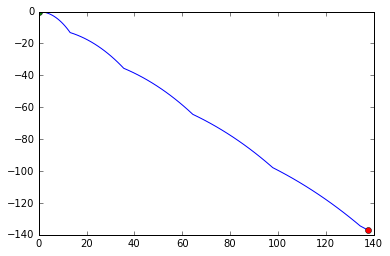

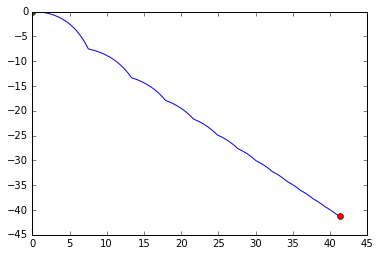

In [149]:
#grados=[(pi/4),((2/3)*pi),((1/3)*pi)]
#for i in grados:
def e_mov_pin(r_v,t,fric=0,g= 9.8,m=1):
    an=pi/4
    u =sqrt(r_v[2]**2+r_v[3]**2)
    dx = r_v[2]
    dy = r_v[3]
    if fric==0:
        dvx,dvy = (g/m)*sin(an),-(g/m)*cos(an)
        #print "No use un modelo de friccion"
    else:
        dvx = (g/m)*sin(an) -fric([r_v[2],r_v[3]])[0]
        dvy = -(g/m)*cos(an) -fric([r_v[2],r_v[3]])[1]
        #print "Use un modelo de friccion"
    return array([dx,dy,dvx,dvy])
inicio= [0,0,6,6]
an=pi/4
N = 80
trayectoria = zeros((N,len(inicio)))
mi_dt= .1
trayectoria[0,:]= array(inicio)
for i in range(N-1): # restamos el pinto inicial
    t,sol_dt = RK4(e_mov_pin,trayectoria[i,:],[0,mi_dt],fric_v)
    if sol_dt[-1,:][1] < 0 : # si cambia de signo
        punto = rebote(trayectoria[i,:],mi_dt,fric_v)
        trayectoria[i+1,:] = punto
    else:
        trayectoria[i+1,:] = sol_dt[-1,:] # ultimo punto de la simulación, punto siguiente de la trayectoria

plot((trayectoria[:,0]*cos(an)+trayectoria[:,1]*(sin(an))),(-trayectoria[:,0]*(sin(an))+trayectoria[:,1]*cos(an)),"-")
plot((trayectoria[0,0]*cos(an)+trayectoria[0,1]*(sin(an))),(-trayectoria[0,0]*(sin(an))+trayectoria[0,1]*cos(an)),"o")
plot((trayectoria[-1,0]*cos(an)+trayectoria[-1,1]*(sin(an))),(-trayectoria[-1,0]*(sin(an))+trayectoria[-1,1]*cos(an)),"o")

show()

inicio= [0,0,6,6]
an=pi/4
N = 80
trayectoria = zeros((N,len(inicio)))
mi_dt= .1
trayectoria[0,:]= array(inicio)
for i in range(N-1): # restamos el pinto inicial
    t,sol_dt = RK4(e_mov_pin,trayectoria[i,:],[0,mi_dt],fric_v2)
    if sol_dt[-1,:][1] < 0 : # si cambia de signo
        punto = rebote(trayectoria[i,:],mi_dt,fric_v2)
        trayectoria[i+1,:] = punto
    else:
        trayectoria[i+1,:] = sol_dt[-1,:] # ultimo punto de la simulación, punto siguiente de la trayectoria

plot((trayectoria[:,0]*cos(an)+trayectoria[:,1]*(sin(an))),(-trayectoria[:,0]*(sin(an))+trayectoria[:,1]*cos(an)),"-")
plot((trayectoria[0,0]*cos(an)+trayectoria[0,1]*(sin(an))),(-trayectoria[0,0]*(sin(an))+trayectoria[0,1]*cos(an)),"o")
plot((trayectoria[-1,0]*cos(an)+trayectoria[-1,1]*(sin(an))),(-trayectoria[-1,0]*(sin(an))+trayectoria[-1,1]*cos(an)),"o")

show()

# Grafica del movimiento con $\alpha$= 30°
   Comparando trayectorias con una fricción = v y fricción = v²|

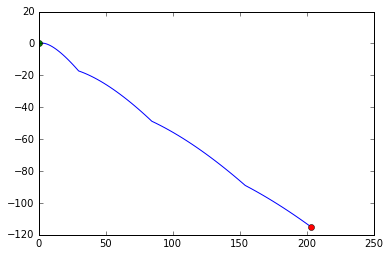

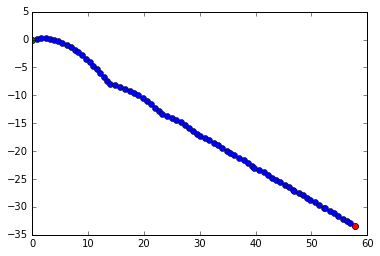

In [148]:
def e_mov_pin(r_v,t,fric=0,g= 9.8,m=1):
    an=(pi/3)
    u =sqrt(r_v[2]**2+r_v[3]**2)
    dx = r_v[2]
    dy = r_v[3]
    if fric==0:
        dvx,dvy = (g/m)*sin(an),-(g/m)*cos(an)
        #print "No use un modelo de friccion"
    else:
        dvx = (g/m)*sin(an) -fric([r_v[2],r_v[3]])[0]
        dvy = -(g/m)*cos(an) -fric([r_v[2],r_v[3]])[1]
        #print "Use un modelo de friccion"
    return array([dx,dy,dvx,dvy])
inicio= [0,0,6,6]
an=(pi/6)
N = 80
trayectoria = zeros((N,len(inicio)))
mi_dt= .1
trayectoria[0,:]= array(inicio)
for i in range(N-1): # restamos el pinto inicial
    t,sol_dt = RK4(e_mov_pin,trayectoria[i,:],[0,mi_dt],fric_v)
    if sol_dt[-1,:][1] < 0 : # si cambia de signo
        punto = rebote(trayectoria[i,:],mi_dt,fric_v)
        trayectoria[i+1,:] = punto
    else:
        trayectoria[i+1,:] = sol_dt[-1,:] # ultimo punto de la simulación, punto siguiente de la trayectoria

plot((trayectoria[:,0]*cos(an)+trayectoria[:,1]*(sin(an))),(-trayectoria[:,0]*(sin(an))+trayectoria[:,1]*cos(an)),"-")
plot((trayectoria[0,0]*cos(an)+trayectoria[0,1]*(sin(an))),(-trayectoria[0,0]*(sin(an))+trayectoria[0,1]*cos(an)),"o")
plot((trayectoria[-1,0]*cos(an)+trayectoria[-1,1]*(sin(an))),(-trayectoria[-1,0]*(sin(an))+trayectoria[-1,1]*cos(an)),"o")

show()

inicio= [0,0,6,6]
an=(pi/6)
N = 80
trayectoria = zeros((N,len(inicio)))
mi_dt= .1
trayectoria[0,:]= array(inicio)
for i in range(N-1): # restamos el pinto inicial
    t,sol_dt = RK4(e_mov_pin,trayectoria[i,:],[0,mi_dt],fric_v2)
    if sol_dt[-1,:][1] < 0 : # si cambia de signo
        punto = rebote(trayectoria[i,:],mi_dt,fric_v2)
        trayectoria[i+1,:] = punto
    else:
        trayectoria[i+1,:] = sol_dt[-1,:] # ultimo punto de la simulación, punto siguiente de la trayectoria

plot((trayectoria[:,0]*cos(an)+trayectoria[:,1]*(sin(an))),(-trayectoria[:,0]*(sin(an))+trayectoria[:,1]*cos(an)),"o-")
plot((trayectoria[0,0]*cos(an)+trayectoria[0,1]*(sin(an))),(-trayectoria[0,0]*(sin(an))+trayectoria[0,1]*cos(an)),"o")
plot((trayectoria[-1,0]*cos(an)+trayectoria[-1,1]*(sin(an))),(-trayectoria[-1,0]*(sin(an))+trayectoria[-1,1]*cos(an)),"o")

show()

# Grafica del movimiento con $\alpha$= 15°
   Comparando trayectorias con una fricción = v y fricción = v²

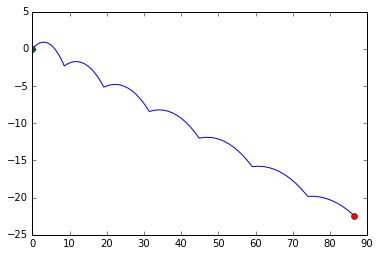

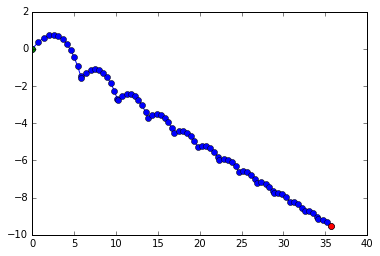

In [150]:
def e_mov_pin(r_v,t,fric=0,g= 9.8,m=1):
    an=(pi/12)
    u =sqrt(r_v[2]**2+r_v[3]**2)
    dx = r_v[2]
    dy = r_v[3]
    if fric==0:
        dvx,dvy = (g/m)*sin(an),-(g/m)*cos(an)
        #print "No use un modelo de friccion"
    else:
        dvx = (g/m)*sin(an) -fric([r_v[2],r_v[3]])[0]
        dvy = -(g/m)*cos(an) -fric([r_v[2],r_v[3]])[1]
        #print "Use un modelo de friccion"
    return array([dx,dy,dvx,dvy])
inicio= [0,0,6,6]
an=(pi/12)
N = 80
trayectoria = zeros((N,len(inicio)))
mi_dt= .1
trayectoria[0,:]= array(inicio)
for i in range(N-1): # restamos el pinto inicial
    t,sol_dt = RK4(e_mov_pin,trayectoria[i,:],[0,mi_dt],fric_v)
    if sol_dt[-1,:][1] < 0 : # si cambia de signo
        punto = rebote(trayectoria[i,:],mi_dt,fric_v)
        trayectoria[i+1,:] = punto
    else:
        trayectoria[i+1,:] = sol_dt[-1,:] # ultimo punto de la simulación, punto siguiente de la trayectoria

plot((trayectoria[:,0]*cos(an)+trayectoria[:,1]*(sin(an))),(-trayectoria[:,0]*(sin(an))+trayectoria[:,1]*cos(an)),"-")
plot((trayectoria[0,0]*cos(an)+trayectoria[0,1]*(sin(an))),(-trayectoria[0,0]*(sin(an))+trayectoria[0,1]*cos(an)),"o")
plot((trayectoria[-1,0]*cos(an)+trayectoria[-1,1]*(sin(an))),(-trayectoria[-1,0]*(sin(an))+trayectoria[-1,1]*cos(an)),"o")
title=" Rebote sobre plano con $\alpha$=15° con fricción= v"
xlabel="x"
ylabel="h"

show()





inicio= [0,0,6,6]
an=(pi/12)
N = 80
trayectoria = zeros((N,len(inicio)))
mi_dt= .1
trayectoria[0,:]= array(inicio)
for i in range(N-1): # restamos el pinto inicial
    t,sol_dt = RK4(e_mov_pin,trayectoria[i,:],[0,mi_dt],fric_v2)
    if sol_dt[-1,:][1] < 0 : # si cambia de signo
        punto = rebote(trayectoria[i,:],mi_dt,fric_v2)
        trayectoria[i+1,:] = punto
    else:
        trayectoria[i+1,:] = sol_dt[-1,:] # ultimo punto de la simulación, punto siguiente de la trayectoria

plot((trayectoria[:,0]*cos(an)+trayectoria[:,1]*(sin(an))),(-trayectoria[:,0]*(sin(an))+trayectoria[:,1]*cos(an)),"o-")
#title("Rebote sobre plano con aplha =15 con fricción al cuadrado de la velocidad")
#xlabel("x")
#ylabel("h")
plot((trayectoria[0,0]*cos(an)+trayectoria[0,1]*(sin(an))),(-trayectoria[0,0]*(sin(an))+trayectoria[0,1]*cos(an)),"o")
plot((trayectoria[-1,0]*cos(an)+trayectoria[-1,1]*(sin(an))),(-trayectoria[-1,0]*(sin(an))+trayectoria[-1,1]*cos(an)),"o")

show()

Como se puede observar en cada una de las simulaciones las graficas obtenidas usando una fricción igual a la velocidad de la pelota alcanzan desplazarse sobre el plano a mayor distancia que en el caso de la trayectoria descrita por la pelota que rebota con una fuerza de fricción que va como v², ademas que en este caso los periodos y altura de bote se acortan notablemente conforme deciende la pelota por el plano.

# Modificacion de las condiciones iniciales.

Para calcular los valores de Vox tales que :
$$V_{0x} < 0$$
$$tan^{-1} (\frac{V_{0y}}{V_{0x}}) > \alpha $$

Definida la función que nos dará los valores de Voy que cumplan con las condiciones especificadas, damos para cada ángulo del plano las condiciones iniciales en las velocidades. para la funcion contemple que como el ángulo que se debia obtener de $V_{0x} < 0$ tiene que ser mayor a los angulos pedidos les dí un aumento arbitrario, como un casó particular le pedi que el aumeto de $\alpha$ sea 1

In [129]:
def voy(alpha,V0x,m=1):
    voy=V0x/(tan(alpha + m))
    return voy

Graficando para cada caso los valores obtenidos:

# Grafica para $\alpha$ = 45°

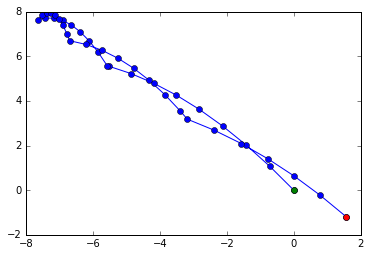

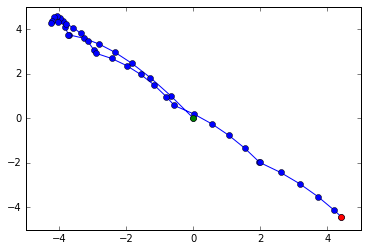

In [126]:
def e_mov_pin(r_v,t,fric=0,g= 9.8,m=1):
    an=pi/4
    u =sqrt(r_v[2]**2+r_v[3]**2)
    dx = r_v[2]
    dy = r_v[3]
    if fric==0:
        dvx,dvy = (g/m)*sin(an),-(g/m)*cos(an)
        #print "No use un modelo de friccion"
    else:
        dvx = (g/m)*sin(an) -fric([r_v[2],r_v[3]])[0]
        dvy = -(g/m)*cos(an) -fric([r_v[2],r_v[3]])[1]
        #print "Use un modelo de friccion"
    return array([dx,dy,dvx,dvy])


  # Calcula y grafica la función de movimiento
an=pi/4
vox=-13
voy=voy(an,vox)

inicio= [0,0,vox,voy]

N = 40
trayectoria = zeros((N,len(inicio)))
mi_dt= .1
trayectoria[0,:]= array(inicio)
for i in range(N-1): # restamos el pinto inicial
    t,sol_dt = RK4(e_mov_pin,trayectoria[i,:],[0,mi_dt],fric_v)
    if sol_dt[-1,:][1] < 0 : # si cambia de signo
        punto = rebote(trayectoria[i,:],mi_dt,fric_v)
        trayectoria[i+1,:] = punto
    else:
        trayectoria[i+1,:] = sol_dt[-1,:] # ultimo punto de la simulación, punto siguiente de la trayectoria

plot((trayectoria[:,0]*cos(an)+trayectoria[:,1]*(sin(an))),(-trayectoria[:,0]*(sin(an))+trayectoria[:,1]*cos(an)),"o-")
plot((trayectoria[0,0]*cos(an)+trayectoria[0,1]*(sin(an))),(-trayectoria[0,0]*(sin(an))+trayectoria[0,1]*cos(an)),"o")
plot((trayectoria[-1,0]*cos(an)+trayectoria[-1,1]*(sin(an))),(-trayectoria[-1,0]*(sin(an))+trayectoria[-1,1]*cos(an)),"o")

show()


inicio= [0,0,vox,voy]
N = 40
trayectoria = zeros((N,len(inicio)))
mi_dt= .1
trayectoria[0,:]= array(inicio)
for i in range(N-1): # restamos el pinto inicial
    t,sol_dt = RK4(e_mov_pin,trayectoria[i,:],[0,mi_dt],fric_v2)
    if sol_dt[-1,:][1] < 0 : # si cambia de signo
        punto = rebote(trayectoria[i,:],mi_dt,fric_v2)
        trayectoria[i+1,:] = punto
    else:
        trayectoria[i+1,:] = sol_dt[-1,:] # ultimo punto de la simulación, punto siguiente de la trayectoria

plot((trayectoria[:,0]*cos(an)+trayectoria[:,1]*(sin(an))),(-trayectoria[:,0]*(sin(an))+trayectoria[:,1]*cos(an)),"o-")
plot((trayectoria[0,0]*cos(an)+trayectoria[0,1]*(sin(an))),(-trayectoria[0,0]*(sin(an))+trayectoria[0,1]*cos(an)),"o")
plot((trayectoria[-1,0]*cos(an)+trayectoria[-1,1]*(sin(an))),(-trayectoria[-1,0]*(sin(an))+trayectoria[-1,1]*cos(an)),"o")

show()

# Grafica para $\alpha$ = 30°

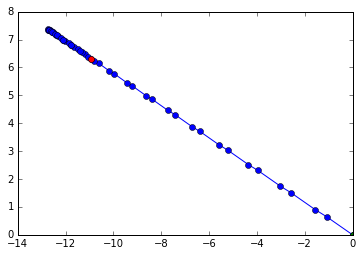

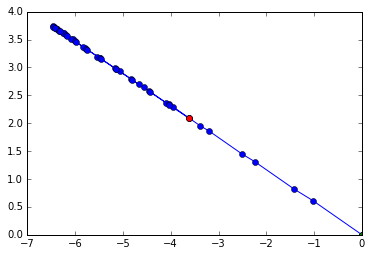

In [130]:
def e_mov_pin(r_v,t,fric=0,g= 9.8,m=1):
    an=(pi/6)
    u =sqrt(r_v[2]**2+r_v[3]**2)
    dx = r_v[2]
    dy = r_v[3]
    if fric==0:
        dvx,dvy = (g/m)*sin(an),-(g/m)*cos(an)
        #print "No use un modelo de friccion"
    else:
        dvx = (g/m)*sin(an) -fric([r_v[2],r_v[3]])[0]
        dvy = -(g/m)*cos(an) -fric([r_v[2],r_v[3]])[1]
        #print "Use un modelo de friccion"
    return array([dx,dy,dvx,dvy])


  # Calcula y grafica la función de movimiento
an=(pi/6)
vox=-13
voy=voy(an,vox)

inicio= [0,0,vox,voy]

N = 50
trayectoria = zeros((N,len(inicio)))
mi_dt= .1
trayectoria[0,:]= array(inicio)
for i in range(N-1): # restamos el pinto inicial
    t,sol_dt = RK4(e_mov_pin,trayectoria[i,:],[0,mi_dt],fric_v)
    if sol_dt[-1,:][1] < 0 : # si cambia de signo
        punto = rebote(trayectoria[i,:],mi_dt,fric_v)
        trayectoria[i+1,:] = punto
    else:
        trayectoria[i+1,:] = sol_dt[-1,:] # ultimo punto de la simulación, punto siguiente de la trayectoria

plot((trayectoria[:,0]*cos(an)+trayectoria[:,1]*(sin(an))),(-trayectoria[:,0]*(sin(an))+trayectoria[:,1]*cos(an)),"o-")
plot((trayectoria[0,0]*cos(an)+trayectoria[0,1]*(sin(an))),(-trayectoria[0,0]*(sin(an))+trayectoria[0,1]*cos(an)),"o")
plot((trayectoria[-1,0]*cos(an)+trayectoria[-1,1]*(sin(an))),(-trayectoria[-1,0]*(sin(an))+trayectoria[-1,1]*cos(an)),"o")

show()

inicio= [0,0,vox,voy]

N = 50
trayectoria = zeros((N,len(inicio)))
mi_dt= .1
trayectoria[0,:]= array(inicio)
for i in range(N-1): # restamos el pinto inicial
    t,sol_dt = RK4(e_mov_pin,trayectoria[i,:],[0,mi_dt],fric_v2)
    if sol_dt[-1,:][1] < 0 : # si cambia de signo
        punto = rebote(trayectoria[i,:],mi_dt,fric_v2)
        trayectoria[i+1,:] = punto
    else:
        trayectoria[i+1,:] = sol_dt[-1,:] # ultimo punto de la simulación, punto siguiente de la trayectoria

plot((trayectoria[:,0]*cos(an)+trayectoria[:,1]*(sin(an))),(-trayectoria[:,0]*(sin(an))+trayectoria[:,1]*cos(an)),"o-")
plot((trayectoria[0,0]*cos(an)+trayectoria[0,1]*(sin(an))),(-trayectoria[0,0]*(sin(an))+trayectoria[0,1]*cos(an)),"o")
plot((trayectoria[-1,0]*cos(an)+trayectoria[-1,1]*(sin(an))),(-trayectoria[-1,0]*(sin(an))+trayectoria[-1,1]*cos(an)),"o")

show()

# Grafica para $\alpha$ = 15°

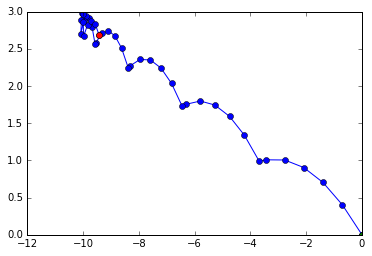

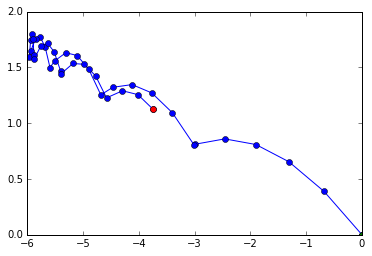

In [121]:
def e_mov_pin(r_v,t,fric=0,g= 9.8,m=1):
    an=(pi/12)
    u =sqrt(r_v[2]**2+r_v[3]**2)
    dx = r_v[2]
    dy = r_v[3]
    if fric==0:
        dvx,dvy = (g/m)*sin(an),-(g/m)*cos(an)
        #print "No use un modelo de friccion"
    else:
        dvx = (g/m)*sin(an) -fric([r_v[2],r_v[3]])[0]
        dvy = -(g/m)*cos(an) -fric([r_v[2],r_v[3]])[1]
        #print "Use un modelo de friccion"
    return array([dx,dy,dvx,dvy])


  # Calcula y grafica la función de movimiento
an=(pi/12)
vox=-8
voy=voy(an,vox)

inicio= [0,0,vox,voy]
N = 40
trayectoria = zeros((N,len(inicio)))
mi_dt= .1
trayectoria[0,:]= array(inicio)
for i in range(N-1): # restamos el pinto inicial
    t,sol_dt = RK4(e_mov_pin,trayectoria[i,:],[0,mi_dt],fric_v)
    if sol_dt[-1,:][1] < 0 : # si cambia de signo
        punto = rebote(trayectoria[i,:],mi_dt,fric_v)
        trayectoria[i+1,:] = punto
    else:
        trayectoria[i+1,:] = sol_dt[-1,:] # ultimo punto de la simulación, punto siguiente de la trayectoria

plot((trayectoria[:,0]*cos(an)+trayectoria[:,1]*(sin(an))),(-trayectoria[:,0]*(sin(an))+trayectoria[:,1]*cos(an)),"o-")
plot((trayectoria[0,0]*cos(an)+trayectoria[0,1]*(sin(an))),(-trayectoria[0,0]*(sin(an))+trayectoria[0,1]*cos(an)),"o")
plot((trayectoria[-1,0]*cos(an)+trayectoria[-1,1]*(sin(an))),(-trayectoria[-1,0]*(sin(an))+trayectoria[-1,1]*cos(an)),"o")

show()
inicio= [0,0,vox,voy]
N = 40
trayectoria = zeros((N,len(inicio)))
mi_dt= .1
trayectoria[0,:]= array(inicio)
for i in range(N-1): # restamos el pinto inicial
    t,sol_dt = RK4(e_mov_pin,trayectoria[i,:],[0,mi_dt],fric_v2)
    if sol_dt[-1,:][1] < 0 : # si cambia de signo
        punto = rebote(trayectoria[i,:],mi_dt,fric_v2)
        trayectoria[i+1,:] = punto
    else:
        trayectoria[i+1,:] = sol_dt[-1,:] # ultimo punto de la simulación, punto siguiente de la trayectoria

plot((trayectoria[:,0]*cos(an)+trayectoria[:,1]*(sin(an))),(-trayectoria[:,0]*(sin(an))+trayectoria[:,1]*cos(an)),"o-")
plot((trayectoria[0,0]*cos(an)+trayectoria[0,1]*(sin(an))),(-trayectoria[0,0]*(sin(an))+trayectoria[0,1]*cos(an)),"o")
plot((trayectoria[-1,0]*cos(an)+trayectoria[-1,1]*(sin(an))),(-trayectoria[-1,0]*(sin(an))+trayectoria[-1,1]*cos(an)),"o")

show()

Es bastante apreciable en los 3 casos que al usar velocidades negativas lo que forzamos al sistema es que la pelota ascienda primero hasta cierta altura sobre el plano, pero por acción de la gravedad, la pelota despues de alcanzar su maxima altura empieza a decender y vemos que los periodos de su rebote se modifican , se van haciendo mas pequeños conforme sube y vuelven a ensancharse cuando deciende la pelota, esto es mas visicle con las graficas que emplean la fricción al cuadrado de la velocidad, con este tipo de friccion la pelota se ve limitada al numero de botes y de la altura que alcanza. En el caso con el ángulo de 30° la trayectoria que describe parece mas a una línea recta, la altura que alcanza con los botes es demasiado pequeña.